## Problem Statement: 
- Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.
-  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

In [2]:
df = pd.read_csv(r"C:\Users\kiran\Desktop\datatrained\Internship\Final Evaluation projets\Third-Phase-Evaluation-Projects--1-\Rainfall Weather Forecasting\Rainfall.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

#### Columns
- Date  - The date of observation
- Location  -The common name of the location of the weather station
- MinTemp  -The minimum temperature in degrees celsius
- MaxTemp -The maximum temperature in degrees celsius
- Rainfall  -The amount of rainfall recorded for the day in mm
- Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am
- Sunshine  -The number of hours of bright sunshine in the day.
- WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight
- WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight
- WindDir9am -Direction of the wind at 9am
- WindDir3pm -Direction of the wind at 3pm
- WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am
- WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm
- Humidity9am -Humidity (percent) at 9am
- Humidity3pm -Humidity (percent) at 3pm
- Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am
- Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm
- Cloud9am - Fraction of sky obscured by cloud at 9am. 
- Cloud3pm -Fraction of sky obscured by cloud 
- Temp9am-Temperature (degrees C) at 9am
- Temp3pm -Temperature (degrees C) at 3pm
- RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
- RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk".

#### Target
1. RainTomorrow
2. Rainfall

#### Analising basic metrics

In [4]:
df.shape

(8425, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

##### Findings
- There are 7 Object Type columns and 16 Numerical columns
- Date column must be converted into datetime data type

In [6]:
# Convert the 'date_column' to datetime data type
df['Date'] = pd.to_datetime(df['Date'])

# Extract Month and Year
df['month'] = df['Date'].dt.month
df['year'] = df['Date'].dt.year


In [7]:
dfg_1=df.groupby(df['month']).agg(lambda x: x.value_counts().index[0])
dfg_1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year
month,,,,,,,,,,,,,,,,,,,,,,,,
1,2011-01-24,Melbourne,20.1,28.2,0.0,7.0,13.1,S,39.0,SE,SSE,9.0,19.0,67.0,48.0,1014.8,1009.6,7.0,1.0,24.2,24.1,No,No,2011
2,2011-02-22,Williamtown,19.8,29.5,0.0,8.0,12.2,E,31.0,SE,SE,9.0,24.0,71.0,55.0,1018.4,1017.8,7.0,1.0,26.5,25.5,No,No,2011
3,2011-03-24,Williamtown,18.4,26.7,0.0,4.0,11.2,E,39.0,N,SE,13.0,13.0,82.0,70.0,1018.7,1017.9,7.0,1.0,23.0,26.0,No,No,2011
4,2009-04-01,Williamtown,14.2,24.5,0.0,4.0,10.4,SSE,31.0,SW,SE,0.0,19.0,73.0,56.0,1014.8,1019.6,7.0,7.0,19.2,22.5,No,No,2009
5,2011-05-27,Williamtown,11.4,20.8,0.0,3.0,9.4,WNW,28.0,NW,SSE,0.0,9.0,75.0,53.0,1023.7,1020.5,7.0,7.0,18.0,19.2,No,No,2011
6,2011-06-16,Melbourne,8.2,19.0,0.0,1.0,0.0,W,37.0,N,WNW,0.0,9.0,83.0,53.0,1025.3,1024.3,7.0,7.0,13.8,18.0,No,No,2011
7,2009-07-01,Melbourne,9.0,17.0,0.0,1.4,0.0,N,22.0,N,N,0.0,9.0,75.0,46.0,1020.4,1021.1,1.0,7.0,12.0,16.6,No,No,2010
8,2011-08-17,Melbourne,6.0,20.0,0.0,3.4,10.5,N,30.0,N,NW,0.0,9.0,68.0,40.0,1018.2,1019.4,1.0,7.0,11.5,13.9,No,No,2010
9,2011-09-21,Melbourne,9.5,22.3,0.0,3.0,10.6,N,33.0,N,WSW,4.0,9.0,62.0,49.0,1022.9,1019.8,7.0,7.0,15.3,20.8,No,No,2010


In [8]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
month               0
year                0
dtype: int64

<AxesSubplot: >

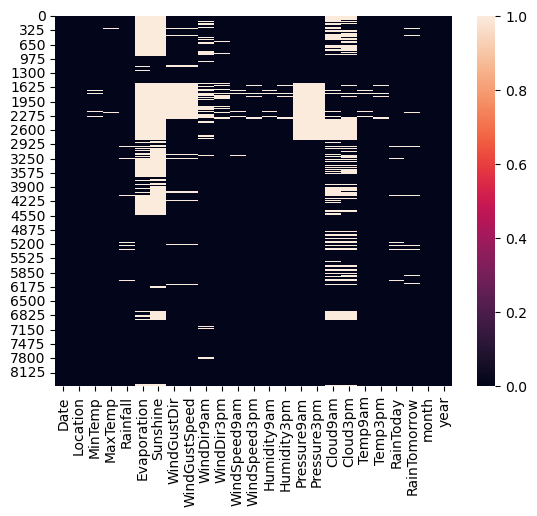

In [9]:
sns.heatmap(df.isnull())

##### Findings

- There are Many Null Values Which are needed to be Treated
- Null Values in target columns must be removed

In [10]:
df.dropna().shape

(3790, 25)

Dropping all null  values is Removing around 55% of data which is a huge loss so we need to impute null values

#### Null Value Treatment

In [11]:
# filling Null Values with Mode Value of their Perticular Month
for i in df.columns:
    if (df[i].isnull().sum() > 0) or (i  not in ['RainToday','RainTomorrow','Rainfall','month','year']):
        for month, value in dfg_1[i].items():
            df.loc[(df['month'] == month) & df[i].isnull(), i] = value

df.dropna(inplace=True)            

In [12]:
df.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
month              12
year               10
dtype: int64

In [13]:
for i in df.columns:
    print (i,'\n',df[i].unique(),end='\n\n\n')

Date 
 ['2008-12-01T00:00:00.000000000' '2008-12-02T00:00:00.000000000'
 '2008-12-03T00:00:00.000000000' ... '2013-06-06T00:00:00.000000000'
 '2013-06-07T00:00:00.000000000' '2013-06-08T00:00:00.000000000']


Location 
 ['Albury' 'CoffsHarbour' 'Newcastle' 'Penrith' 'Williamtown' 'Wollongong'
 'Melbourne' 'Brisbane' 'Adelaide' 'PerthAirport' 'Darwin' 'Uluru']


MinTemp 
 [13.4  7.4 12.9  9.2 17.5 14.6 14.3  7.7  9.7 13.1 15.9 12.6  8.4  9.8
 14.1 13.5 11.2 11.5 17.1 20.5 15.3 16.2 16.9 20.1 19.7 12.5 12.  11.3
  9.6 10.5 12.3 13.7 16.1 14.  17.  17.3 17.2 17.4 19.8 14.9 13.9 18.6
 19.3 24.4 18.8 20.8 15.7 18.5 20.4 21.8 22.3 22.  28.  21.5 21.7 23.5
 28.3 18.4 12.4 13.3 18.  18.7 15.5  8.9 15.  15.4 16.  12.8 13.2 13.8
  7.6  8.3 11.  20.9 16.4 10.   8.8  9.3 14.4 10.8 10.1  9.1 10.4 12.2
 10.7  7.8  8.1  7.5  8.2 11.6 13.   9.9  3.5  6.6  7.   5.7  6.2  6.
 10.6  8.6  4.5  5.4  2.1  1.8  7.2  4.6  4.2  5.2  4.1  3.2  4.3  3.7
  3.6  6.9 10.3  3.   2.6  5.1  4.4  4.7  6.7  8.   2.2  1.

In [14]:
num_col = []
obj_col = []
cat_col = []
ncat_col = []
for i in df.columns[1:23]:
    if df[i].nunique() <= 16:
        cat_col.append(i)
    else:
        ncat_col.append(i)

    if df[i].dtype == object:
        obj_col.append(i)
    else :
        num_col.append(i)      

In [15]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,month,year
count,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.000000,8425.00000,8425.000000,8425.000000,8425.000000
mean,13.207276,23.859988,2.725982,4.990042,8.010148,39.393353,13.779585,18.474065,67.847478,51.229792,1017.835691,1015.650694,4.983145,4.650326,17.77562,22.408712,6.442136,2012.102433
std,5.398169,6.122650,10.319872,4.183860,4.594591,14.066203,10.162951,9.741791,16.787104,18.338801,6.525499,6.525456,2.783831,2.768872,5.62021,5.973482,3.437994,2.473137
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.90000,7.300000,1.000000,2008.000000
25%,9.200000,19.300000,0.000000,3.000000,4.400000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.400000,1010.800000,2.000000,1.000000,13.80000,18.000000,3.000000,2010.000000
50%,13.300000,23.300000,0.000000,4.000000,9.700000,37.000000,13.000000,19.000000,68.000000,51.000000,1018.200000,1016.000000,7.000000,6.000000,17.80000,21.900000,6.000000,2011.000000
75%,17.500000,28.000000,0.800000,7.000000,11.200000,48.000000,20.000000,24.000000,80.000000,63.000000,1022.400000,1020.000000,7.000000,7.000000,22.00000,26.300000,9.000000,2014.000000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.40000,44.100000,12.000000,2017.000000


#### Observations
- Distribution
    - Normally distributed (Since Mean ~= Median)
        - MinTemp
        - MaxTemp
        - sunshine
        - Humidity3am
        - Pressure9am
        - Pressure3pm
        - Temp9am
        - Temp3pm
    - Right skewed (mean > median)
        - Rainfall
        - Evaporation
        - WindGustSpeed
        - WindSpeed9am
        - WindSpeed3pm
        - Humidity9am
    - LEFT skewed (mean < median)
        - Cloud9am
        - Cloud3am

- Many  Outliers(Differences Between Max & 75%,Min & 25%) can be observed

Data Visualization

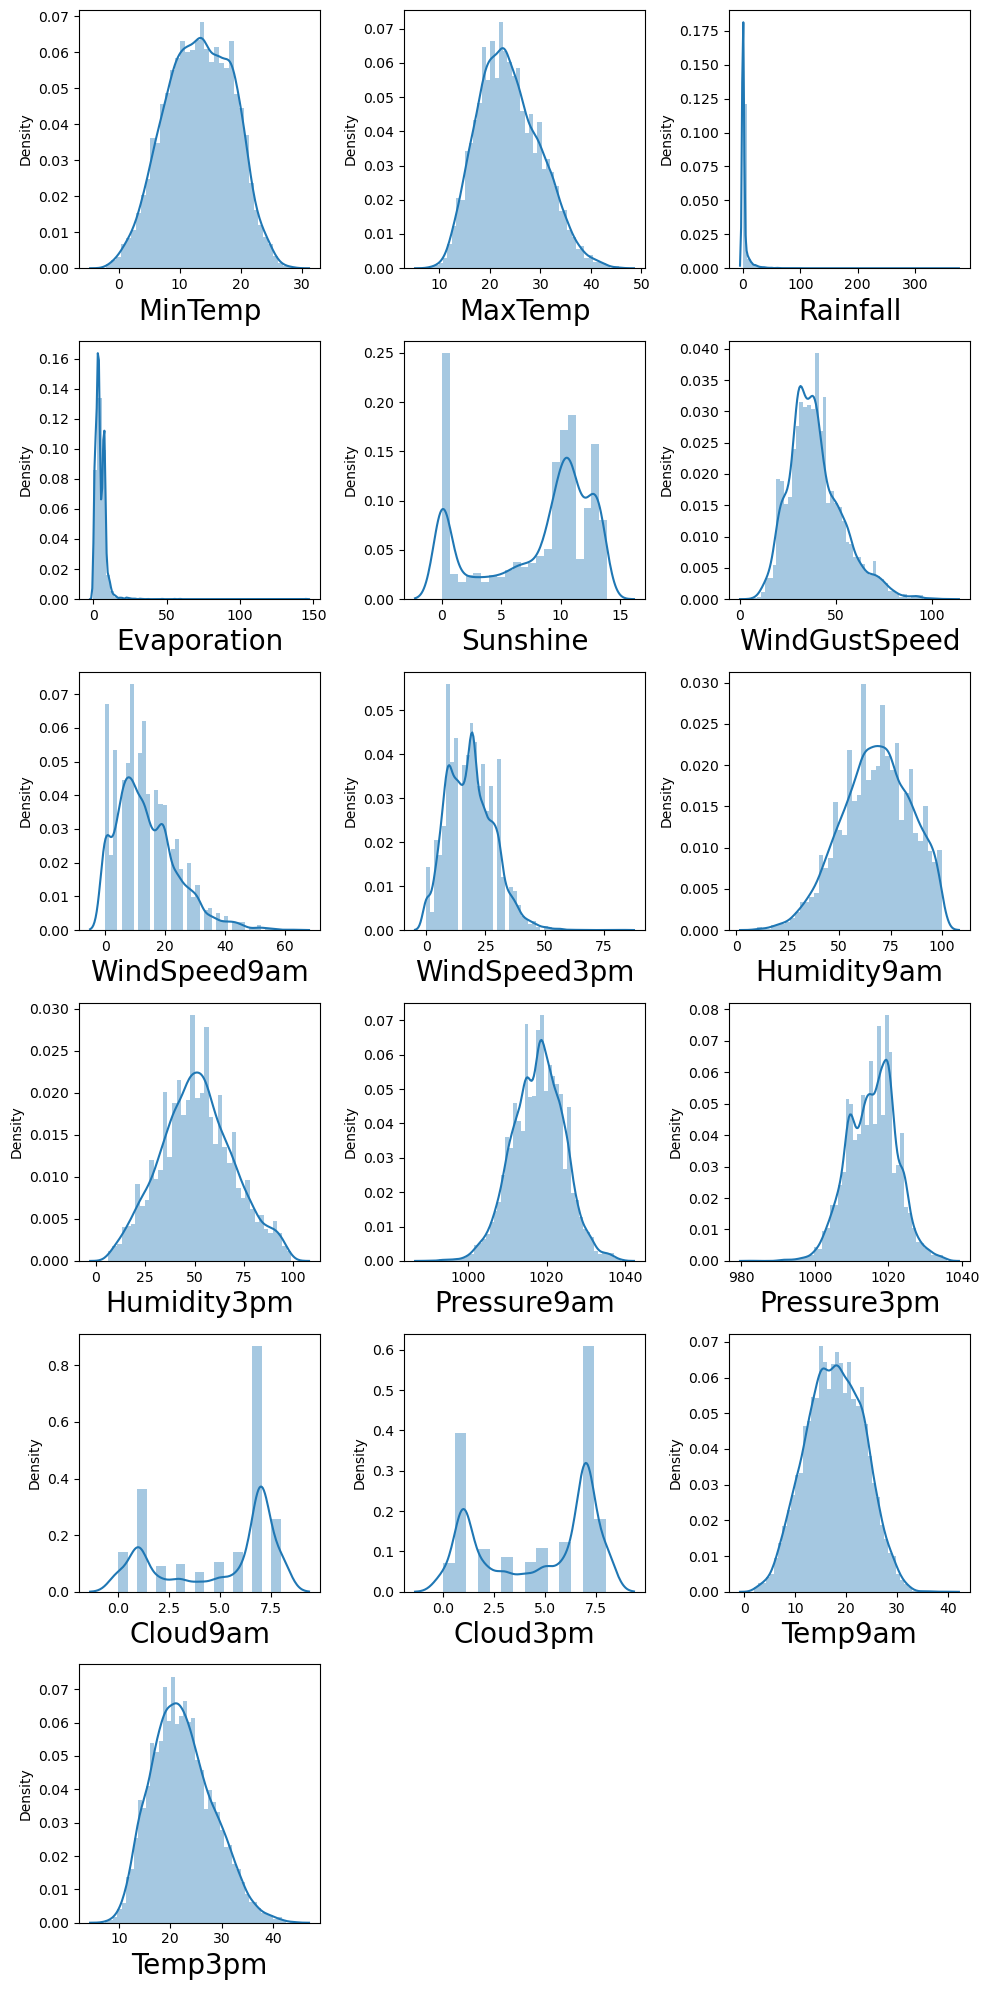

In [16]:
plt.figure(figsize=(10,20))
pn = 1
for column in num_col:
    
    sns.distplot(df[column],ax=plt.subplot(6,3,pn))
    plt.xlabel(column,fontsize = 20)
    pn +=1
    
plt.tight_layout()      

- We can observe that Most of the columns are skewed (Not Normally Distrubuted)
- Skeweness is as discussed earlier
	

We can observe that Highest Amount of Rain occures in Month of June

<AxesSubplot: xlabel='WindGustDir', ylabel='count'>

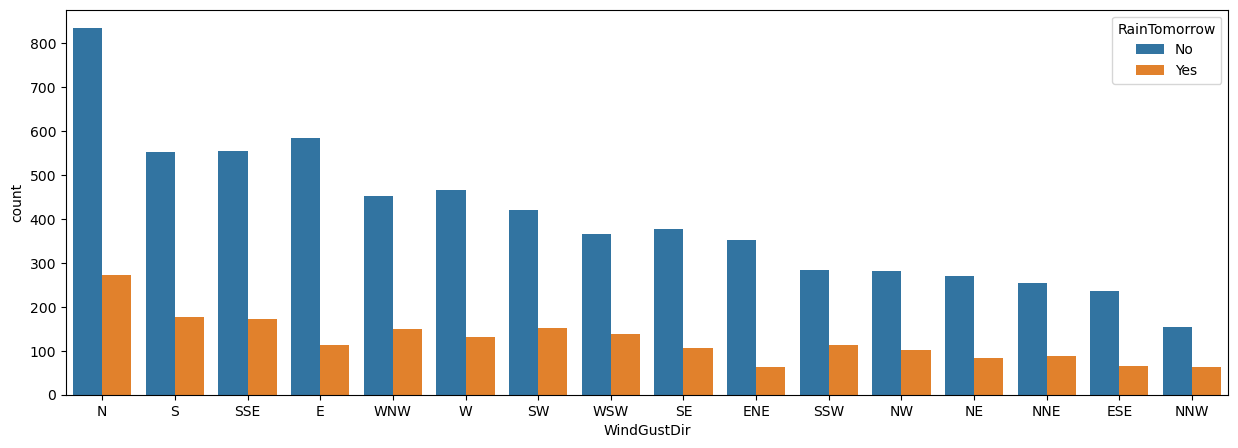

In [17]:
plt.figure(figsize=(15,5))
sns.countplot(data=df,x='WindGustDir',hue='RainTomorrow',order=df.WindGustDir.value_counts().index)

Most winds flow in North Direction and least winds flow in NNW direction

<BarContainer object of 12 artists>

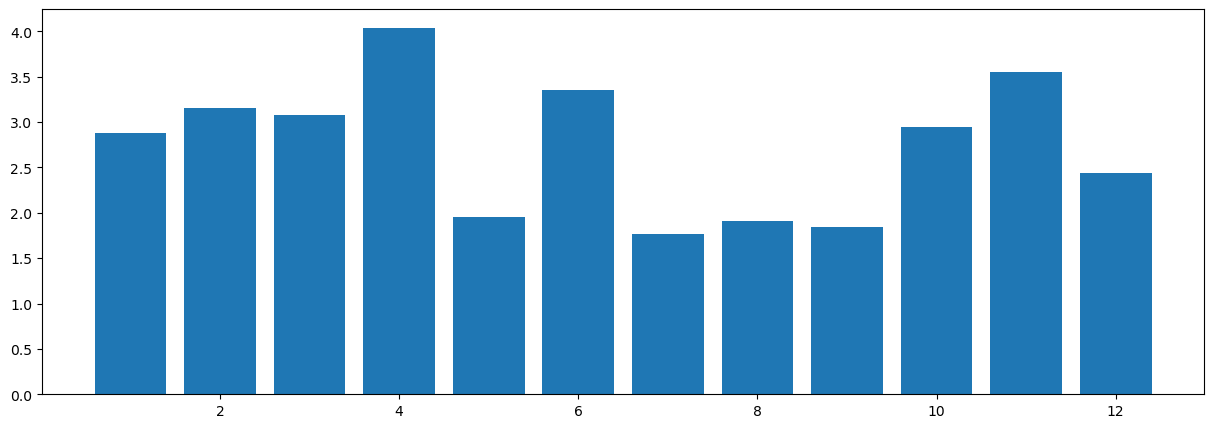

In [18]:
plt.figure(figsize=(15,5))
plt.bar(height=df.groupby(df['month'])['Rainfall'].mean().values,x=df.groupby(df['month'])['Rainfall'].mean().index)

Majority of rain Fall Occures in month of april,and least in month of july

([<matplotlib.patches.Wedge at 0x246d57b73a0>,
 [Text(2.1779866268527424, 0.31044202880829996, 'Adelaide'),
  Text(1.9320879113558103, 1.0521579267356889, 'Albury'),
  Text(1.1314126202910053, 1.8867711791964181, 'Brisbane'),
  Text(-0.7195730439082187, 2.078993659076588, 'CoffsHarbour'),
  Text(-2.0262032951542133, 0.85702987503716, 'Darwin'),
  Text(-2.189787916732058, -0.21172831585376742, 'Melbourne'),
  Text(-1.7928716177530764, -1.2749946518536723, 'Newcastle'),
  Text(-0.8698168463611887, -2.0207470533904726, 'Penrith'),
  Text(0.06700079428141531, -2.1989795118567295, 'PerthAirport'),
  Text(0.49736121699653546, -2.1430426546916244, 'Uluru'),
  Text(1.2051331329257529, -1.8405581033818412, 'Williamtown'),
  Text(2.088159660952224, -0.6925238121334839, 'Wollongong')],
 [Text(1.1879927055560413, 0.16933201571361814, '4.51%'),
  Text(1.0538661334668054, 0.5739043236740121, '6.86%'),
  Text(0.6171341565223665, 1.0291479159253187, '10.07%'),
  Text(-0.39249438758630106, 1.1339965413

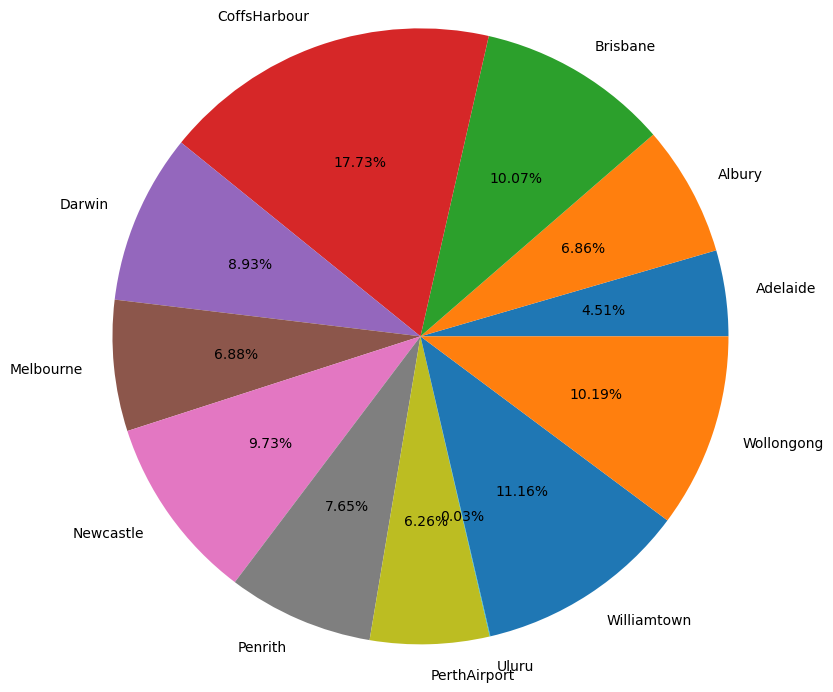

In [19]:
plt.figure(figsize=(15,5))
plt.pie(x=df.groupby(df['Location'])['Rainfall'].mean().values,labels=df.groupby(df['Location'])['Rainfall'].mean().index,radius=2,autopct='%0.2f%%')

Major rainfall Occures in CoffsHarbor, Least Occures in Uluru

<AxesSubplot: xlabel='Pressure3pm', ylabel='Temp3pm'>

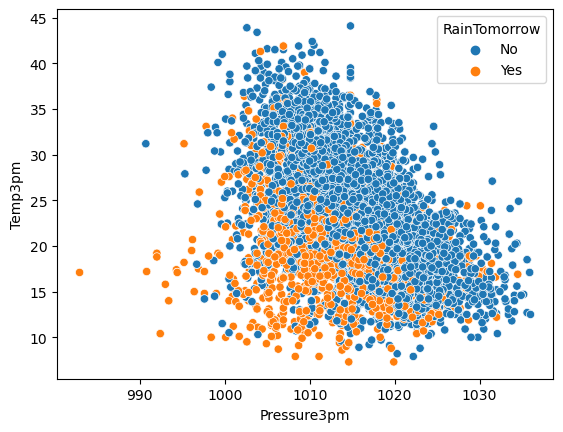

In [20]:
sns.scatterplot(data=df,x='Pressure3pm',y='Temp3pm',hue='RainTomorrow')

- We can observe slight Negative corelation Between Temperature and pressure
- Mostly Rain Occures when Both Temperature and Pressure are Less

<AxesSubplot: xlabel='Humidity3pm', ylabel='WindSpeed3pm'>

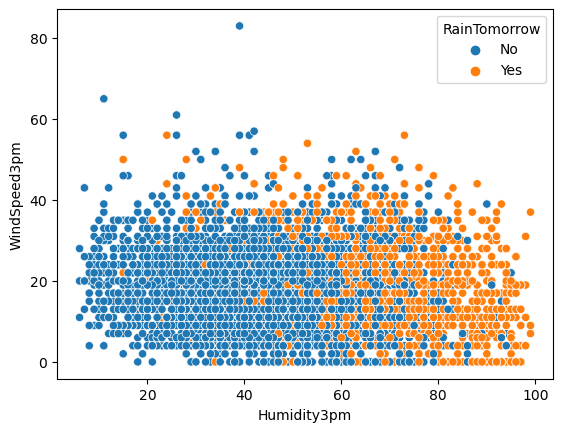

In [21]:
sns.scatterplot(data=df,x='Humidity3pm',y='WindSpeed3pm',hue='RainTomorrow')

- There is No Much Relation between Humidity3pm and Windspeed3pm
- Mostly Rains occur when Humidity is High

<AxesSubplot: xlabel='Cloud3pm', ylabel='Humidity3pm'>

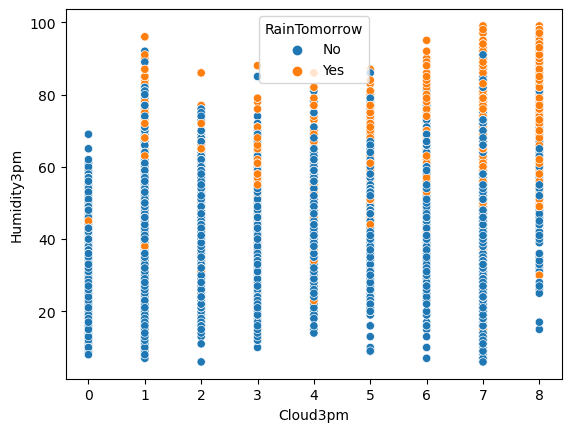

In [22]:
sns.scatterplot(data=df,x='Cloud3pm',y='Humidity3pm',hue='RainTomorrow')

- There is positive Relation between Humidity3pm and clouds can be obsered
- Mostly Rains occur when Humidity and clouds are High

<AxesSubplot: xlabel='Temp3pm', ylabel='Rainfall'>

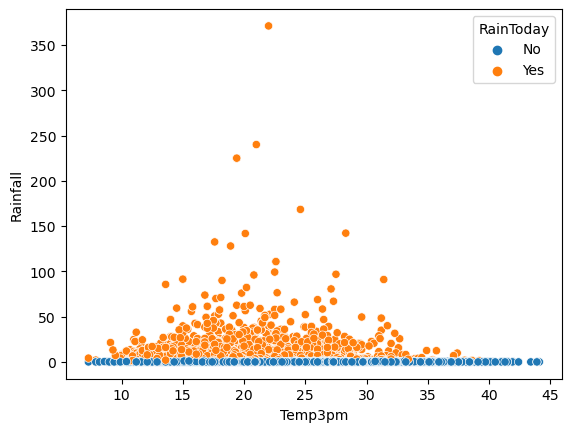

In [23]:
sns.scatterplot(data=df,x='Temp3pm',y='Rainfall',hue='RainToday')

NO Relation Between Temperature and rainfall can be observes

### Encoading Categorical Data

- Label Encoader for 'RainTomorrow' & 'RainToday'
- Binary Encoader for rest Object columns

In [24]:
# Label ENcoading
from sklearn.preprocessing import LabelEncoder
lben= LabelEncoder()
for i in ['RainTomorrow','RainToday']:
    df[i]= lben.fit_transform(df[i])
    label_mapping = dict(zip(lben.classes_, lben.transform(lben.classes_)))
    print("Label mapping:", label_mapping)



Label mapping: {'No': 0, 'Yes': 1}
Label mapping: {'No': 0, 'Yes': 1}


In [25]:
# Binary ENcoading
from category_encoders import BinaryEncoder
ben = BinaryEncoder()
encoaded = ben.fit_transform(df)

In [26]:
df= encoaded
encoaded.head(2)

,Date,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,year
0,2008-12-01,0,0,0,1,13.4,22.9,0.6,7.4,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0,12,2008
1,2008-12-02,0,0,0,1,7.4,25.1,0.0,7.4,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0,12,2008


#### Corelation Analysis

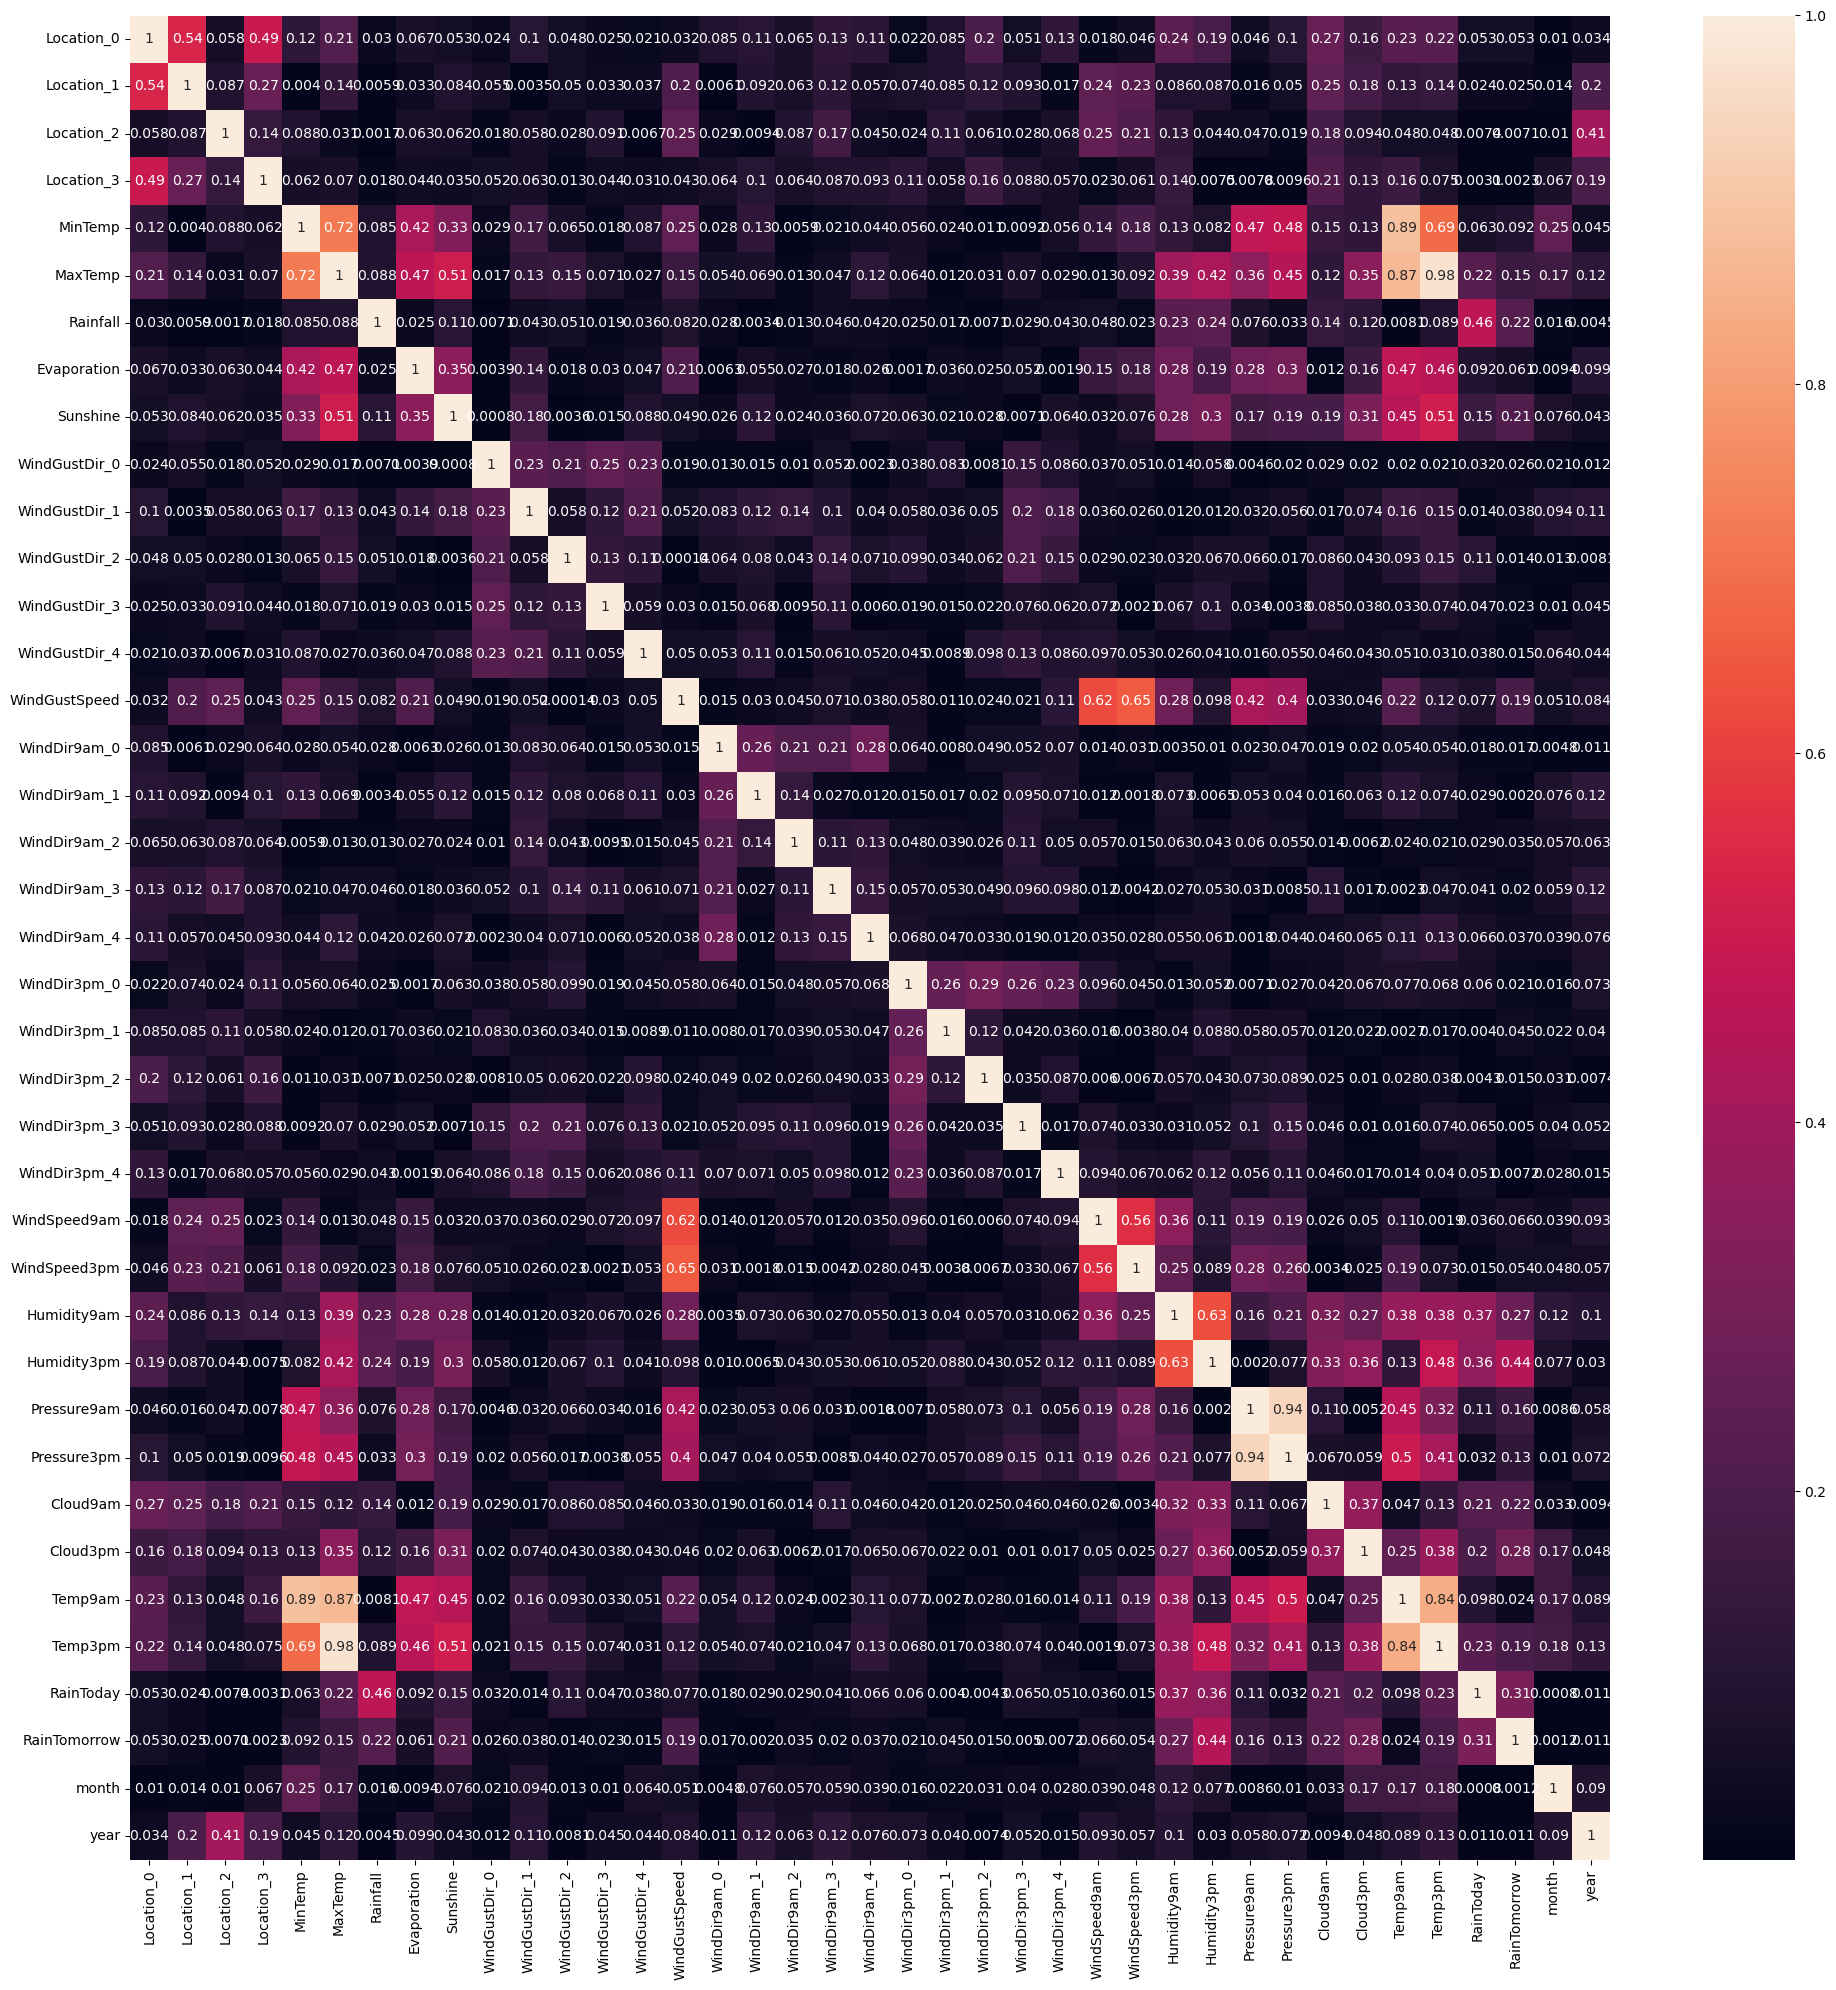

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(),annot=True,annot_kws={'size':10})
plt.tight_layout()

- There is Multicolinearity Observed between all 9am and 3pm columns. But For this dataset i feel Both Are Important
- we can remove date, Month And Year Columns

In [28]:
df.drop(columns=['month','year','Date'],inplace=True)

## Target 1: RainTomorrow (Classification)

### Outliers

In [29]:
df1 = df.copy()
df1

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,0,1,13.4,22.9,0.6,7.4,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,0,0,0,1,7.4,25.1,0.0,7.4,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,0,0,0,1,12.9,25.7,0.0,7.4,13.3,0,0,0,1,1,46.0,0,0,0,0,1,0,0,0,1,0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,0,0,0,1,9.2,28.0,0.0,7.4,13.3,0,0,1,0,0,24.0,0,0,0,1,1,0,0,0,1,1,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,0,0,0,1,17.5,32.3,1.0,7.4,13.3,0,0,0,0,1,41.0,0,0,1,0,0,0,0,1,0,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1,1,0,0,2.8,23.4,0.0,1.0,0.0,0,1,1,1,1,31.0,0,0,0,1,1,0,1,0,0,0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8421,1,1,0,0,3.6,25.3,0.0,1.0,0.0,0,0,1,0,1,22.0,0,0,0,1,1,0,1,1,0,1,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8422,1,1,0,0,5.4,26.9,0.0,1.0,0.0,0,0,1,1,0,37.0,0,0,0,1,1,0,0,0,0,1,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8423,1,1,0,0,7.8,27.0,0.0,1.0,0.0,0,1,1,0,1,28.0,0,0,1,1,0,0,1,1,0,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


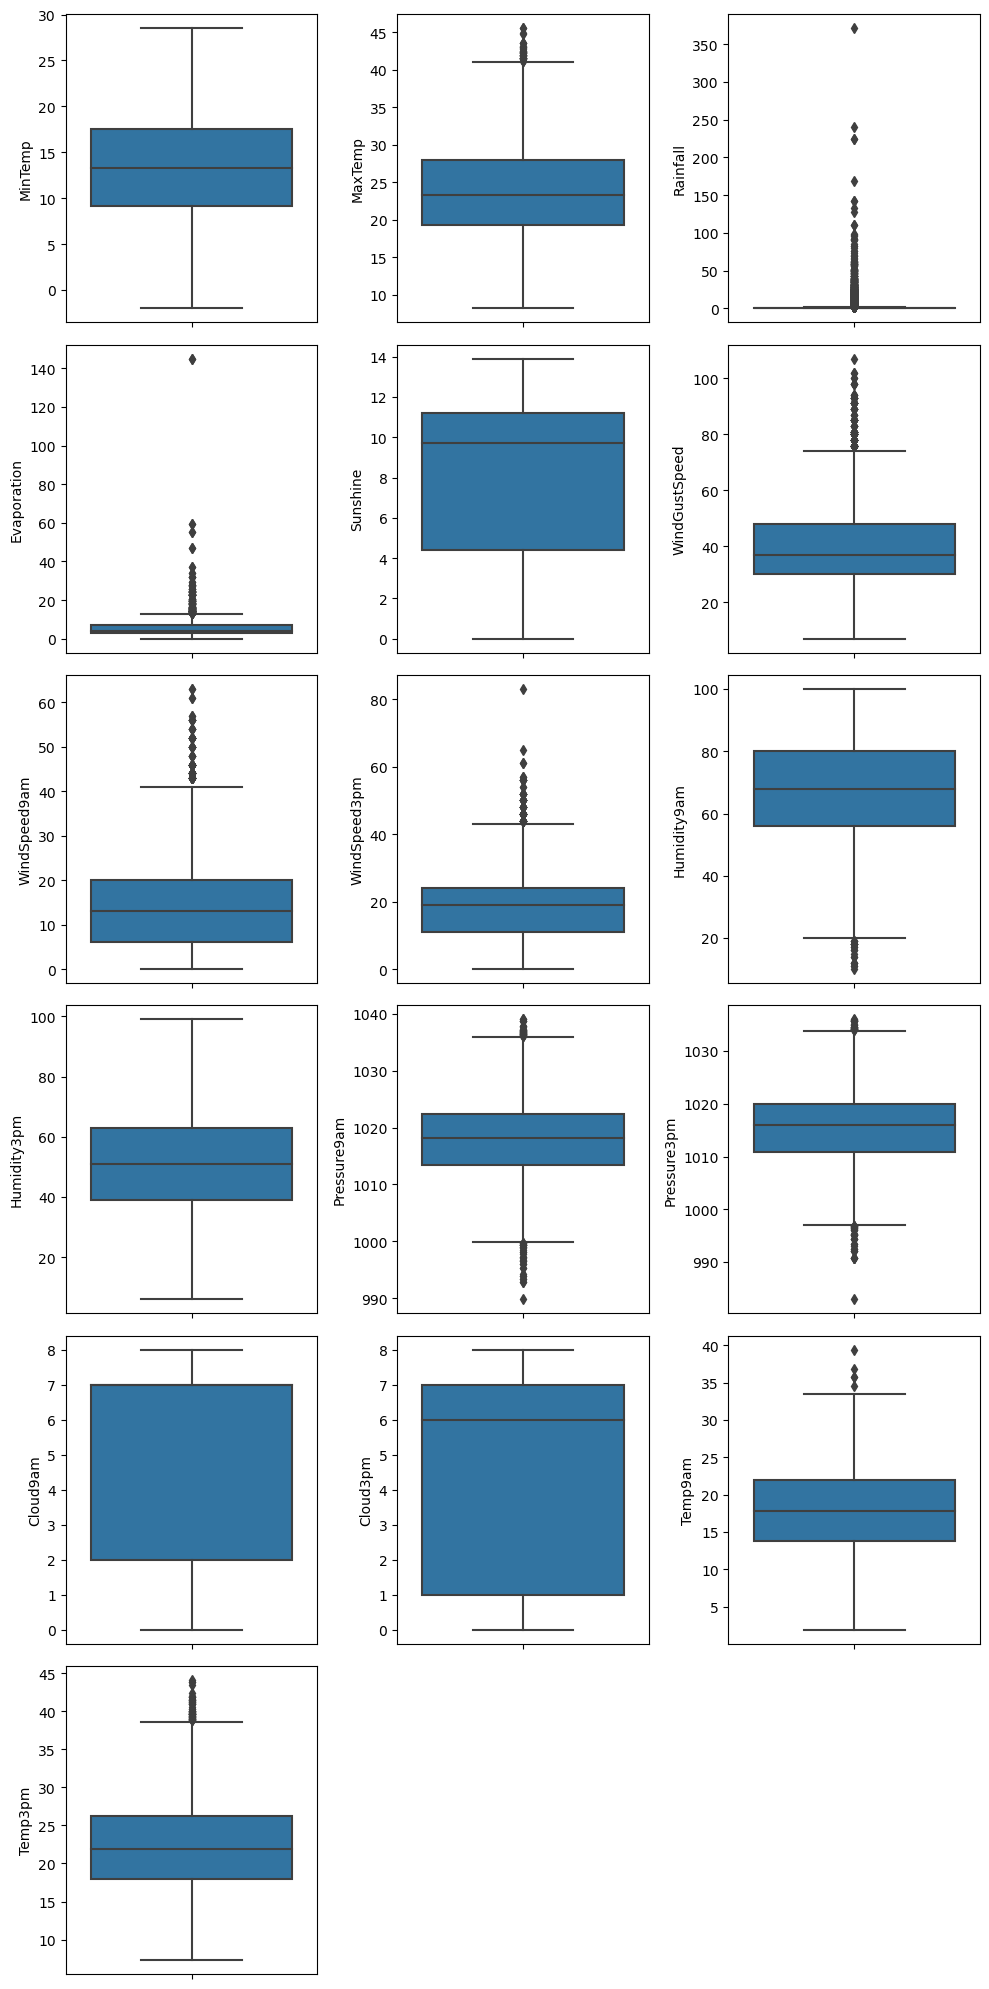

In [30]:
plt.figure(figsize=(10,20))
pn=1
for i in num_col:
    sns.boxplot(data=df1,y=i,ax=plt.subplot(6,3,pn))
    pn+=1
plt.tight_layout()    

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [31]:
prev = df1.shape

In [32]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df1[num_col]))
z[z>3].count()

MinTemp            0
MaxTemp           17
Rainfall         122
Evaporation       82
Sunshine           0
WindGustSpeed     61
WindSpeed9am      78
WindSpeed3pm      47
Humidity9am       13
Humidity3pm        0
Pressure9am       29
Pressure3pm       28
Cloud9am           0
Cloud3pm           0
Temp9am            4
Temp3pm           21
dtype: int64

<AxesSubplot: >

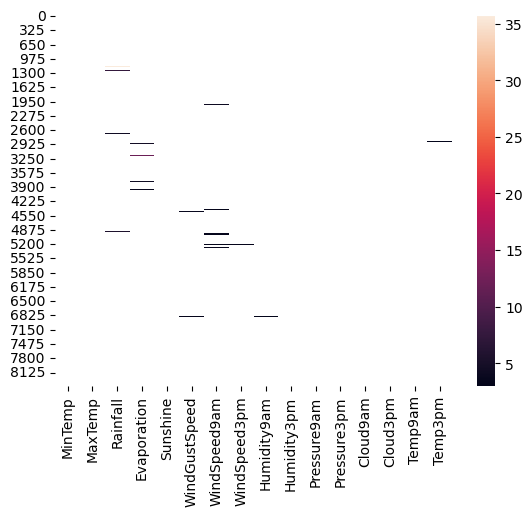

In [33]:
sns.heatmap(z[z>3])

In [34]:
df1[num_col] = df1[num_col][z<3]
df1 = df1.dropna()
df1.reset_index(drop=True,inplace=True)
df1

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,0,1,13.4,22.9,0.6,7.4,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,0,0,0,1,7.4,25.1,0.0,7.4,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,0,0,0,1,12.9,25.7,0.0,7.4,13.3,0,0,0,1,1,46.0,0,0,0,0,1,0,0,0,1,0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,0,0,0,1,9.2,28.0,0.0,7.4,13.3,0,0,1,0,0,24.0,0,0,0,1,1,0,0,0,1,1,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,0,0,0,1,17.5,32.3,1.0,7.4,13.3,0,0,0,0,1,41.0,0,0,1,0,0,0,0,1,0,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,1,1,0,0,2.8,23.4,0.0,1.0,0.0,0,1,1,1,1,31.0,0,0,0,1,1,0,1,0,0,0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8012,1,1,0,0,3.6,25.3,0.0,1.0,0.0,0,0,1,0,1,22.0,0,0,0,1,1,0,1,1,0,1,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8013,1,1,0,0,5.4,26.9,0.0,1.0,0.0,0,0,1,1,0,37.0,0,0,0,1,1,0,0,0,0,1,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8014,1,1,0,0,7.8,27.0,0.0,1.0,0.0,0,1,1,0,1,28.0,0,0,1,1,0,0,1,1,0,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [35]:
df1.shape

(8016, 37)

In [36]:
print('Data Loss % = ',np.round((prev[0]-df1.shape[0])*100/prev[0],2),"%")

Data Loss % =  4.85 %


Since our data loss is only 4.85% we can continue

#### Treating Skewness

In [37]:
df1[num_col].skew().abs()

MinTemp          0.083090
MaxTemp          0.319129
Rainfall         3.526536
Evaporation      0.742111
Sunshine         0.734348
WindGustSpeed    0.615089
WindSpeed9am     0.715365
WindSpeed3pm     0.311277
Humidity9am      0.233629
Humidity3pm      0.129106
Pressure9am      0.009446
Pressure3pm      0.057243
Cloud9am         0.615130
Cloud3pm         0.351652
Temp9am          0.041855
Temp3pm          0.341849
dtype: float64

skeweness of Rainfall and Evaporation Needs to be Treated

In [38]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson',standardize=False)
df1[['Rainfall','Evaporation']] = pt.fit_transform(df1[['Rainfall','Evaporation']])
df1

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,0,1,13.4,22.9,0.320467,2.914337,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,0,0,0,1,7.4,25.1,-0.000000,2.914337,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,0,0,0,1,12.9,25.7,-0.000000,2.914337,13.3,0,0,0,1,1,46.0,0,0,0,0,1,0,0,0,1,0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,0,0,0,1,9.2,28.0,-0.000000,2.914337,13.3,0,0,1,0,0,24.0,0,0,0,1,1,0,0,0,1,1,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,0,0,0,1,17.5,32.3,0.401685,2.914337,13.3,0,0,0,0,1,41.0,0,0,1,0,0,0,0,1,0,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,1,1,0,0,2.8,23.4,-0.000000,0.765367,0.0,0,1,1,1,1,31.0,0,0,0,1,1,0,1,0,0,0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8012,1,1,0,0,3.6,25.3,-0.000000,0.765367,0.0,0,0,1,0,1,22.0,0,0,0,1,1,0,1,1,0,1,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8013,1,1,0,0,5.4,26.9,-0.000000,0.765367,0.0,0,0,1,1,0,37.0,0,0,0,1,1,0,0,0,0,1,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8014,1,1,0,0,7.8,27.0,-0.000000,0.765367,0.0,0,1,1,0,1,28.0,0,0,1,1,0,0,1,1,0,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [39]:
x = df1.drop(columns='RainTomorrow')
y=df1['RainTomorrow']

In [40]:
y.value_counts()

0    6190
1    1826
Name: RainTomorrow, dtype: int64

### Resampling

we shall use Smote 

In [41]:

from imblearn.over_sampling import SMOTE
ov_sm = SMOTE(sampling_strategy=0.80)
x,y = ov_sm.fit_resample(x,y)
y.value_counts()

0    6190
1    4952
Name: RainTomorrow, dtype: int64

#### Standerd scaler

In [42]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,-0.554472,-0.818819,-1.113979,0.921239,0.009862,-0.060093,0.582039,1.069216,1.243146,-0.195705,-0.904059,-0.817138,-0.979039,1.099329,0.322119,-0.204439,-0.985742,-0.800589,-0.806942,0.909481,-0.229611,-0.892154,-0.990887,-0.893127,1.288834,0.691896,0.611688,0.039751,-1.770229,-1.576554,-1.335512,1.036450,0.750620,-0.126612,0.012700,-0.572307
1,-0.554472,-0.818819,-1.113979,0.921239,-1.122533,0.310873,-0.790325,1.069216,1.243146,-0.195705,-0.904059,-0.817138,1.021410,-0.909646,0.322119,-0.204439,-0.985742,-0.800589,1.239246,-1.099528,-0.229611,-0.892154,-0.990887,1.119661,-0.775895,-1.007588,0.398865,-1.612049,-1.611650,-1.113705,-1.224204,0.656832,0.750620,-0.072035,0.443738,-0.572307
2,-0.554472,-0.818819,-1.113979,0.921239,-0.084504,0.412046,-0.790325,1.069216,1.243146,-0.195705,-0.904059,-0.817138,1.021410,1.099329,0.470074,-0.204439,-0.985742,-0.800589,-0.806942,0.909481,-0.229611,-0.892154,-0.990887,1.119661,-0.775895,0.585678,0.824510,-1.979115,-1.347353,-1.592515,-1.081095,0.656832,-1.136704,0.619275,0.254081,-0.572307
3,-0.554472,-0.818819,-1.113979,0.921239,-0.782815,0.799874,-0.790325,1.069216,1.243146,-0.195705,-0.904059,1.223784,-0.979039,-0.909646,-1.157439,-0.204439,-0.985742,-0.800589,1.239246,0.909481,-0.229611,-0.892154,-0.990887,1.119661,1.288834,-0.264064,-0.984481,-1.550871,-2.087385,0.003517,-0.429152,0.656832,0.750620,0.091697,0.823051,-0.572307
4,-0.554472,-0.818819,-1.113979,0.921239,0.783666,1.524944,0.929848,1.069216,1.243146,-0.195705,-0.904059,-0.817138,-0.979039,1.099329,0.100185,-0.204439,-0.985742,1.249081,-0.806942,-1.099528,-0.229611,-0.892154,1.009197,-0.893127,-0.775895,-0.688935,0.186043,0.712706,-1.188775,-1.081784,-1.510423,0.656832,1.128085,0.037119,1.374779,-0.572307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11137,-0.554472,1.221271,0.897683,0.921239,-0.103377,-1.004371,1.591107,1.069216,-0.847434,-0.195705,-0.904059,-0.817138,1.021410,-0.909646,0.765986,-0.204439,-0.985742,1.249081,-0.806942,0.909481,-0.229611,-0.892154,1.009197,1.119661,-0.775895,1.329203,0.186043,1.324483,-0.025867,0.051398,0.715724,0.656832,-1.514169,-0.872499,-1.056273,1.747315
11138,1.803516,-0.818819,0.897683,-1.085495,-1.806596,-0.178096,-0.790325,-0.472783,0.524570,-0.195705,-0.904059,-0.817138,-0.979039,1.099329,-0.695025,-0.204439,-0.985742,-0.800589,-0.806942,-1.099528,-0.229611,-0.892154,-0.990887,-0.893127,-0.775895,-0.662504,-0.213124,-1.214365,-1.254837,1.061078,0.548860,-1.905681,-1.797356,-0.467553,-0.034669,-0.572307
11139,-0.554472,-0.818819,0.897683,-1.085495,0.963074,1.328186,-0.790325,1.509432,-0.121582,-0.195705,-0.904059,-0.817138,-0.979039,-0.909646,1.868523,-0.204439,1.014465,-0.800589,-0.806942,0.909481,-0.229611,1.120883,1.009197,-0.893127,-0.775895,1.931317,1.680929,-1.177907,-1.193870,-0.274058,-0.579447,0.656832,-0.238522,0.991560,1.372390,-0.572307
11140,-0.554472,-0.818819,-1.113979,0.921239,-1.227165,-0.848597,-0.394895,-1.082091,-0.287837,-0.195705,-0.904059,1.223784,-0.979039,-0.909646,0.127255,-0.204439,1.014465,-0.800589,-0.806942,-1.099528,-0.229611,1.120883,-0.990887,-0.893127,-0.775895,-0.563283,-0.346013,0.012152,-0.290164,-0.621655,-1.108633,0.656832,0.750620,-0.923201,-0.696405,-0.572307


### Train test Split

In [43]:
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [44]:
# creating df for storing acuracy  score
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])

In [45]:
# finding best random state
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=i)
    log_reg.fit(x_train,y_train)
    pred_train = log_reg.predict(x_train)
    pred_test = log_reg.predict(x_test)
    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)
    if round(train_acc*100,0) == round(test_acc*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_acc*100,'Test accuracy':test_acc*100},ignore_index=True)

    
tts_df.sort_values('Train accuracy',ascending=False)  

    
    

,Random state,Train accuracy,Test accuracy
226,400.0,83.365247,82.735104
228,404.0,83.197702,82.663317
466,875.0,83.185735,82.770998
152,269.0,83.173767,82.770998
429,815.0,83.173767,82.914573
...,...,...,...
379,703.0,82.515558,83.309404
137,237.0,82.515558,83.452979
268,483.0,82.515558,83.058148
307,549.0,82.503590,83.273510


- we can observe that Random state 400 we get max accuracy wit minimum difference

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state=400)

### Training the model

In [47]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return accuracy_score(y_te,model.predict(x_te))


Logistic regression 

In [48]:
lr = LogisticRegression()
lr_ac_score = mod_train(lr,x_train,x_test,y_train,y_test)
# Find best cv
from sklearn.model_selection import cross_val_score
for i in range(4,10):
    lr_cv_score=cross_val_score(lr,x_scaled,y,cv=i).mean()
    print('\ncv = ',i,'\nCross Validation score = ',lr_cv_score*100,'\nAccuracy score',lr_ac_score*100,end = '\n\n')
    


cv =  4 
Cross Validation score =  65.83408192540028 
Accuracy score 82.73510409188802


cv =  5 
Cross Validation score =  74.24372137154032 
Accuracy score 82.73510409188802


cv =  6 
Cross Validation score =  74.43905941482679 
Accuracy score 82.73510409188802


cv =  7 
Cross Validation score =  74.16307315512645 
Accuracy score 82.73510409188802


cv =  8 
Cross Validation score =  75.30309851804178 
Accuracy score 82.73510409188802


cv =  9 
Cross Validation score =  76.39562017591098 
Accuracy score 82.73510409188802



- cv = 9 is giving best result

In [49]:
cv = 9

In [50]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [51]:
lr_s_cv_score=cross_val_score(lr,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',lr_s_cv_score*100,'\nAccuracy score = ',lr_ac_score*100,'\nDifference = ',lr_ac_score*100-(lr_s_cv_score*100))
ms_df = ms_df.append({'Model':'Logistic regression','CV score':round(lr_s_cv_score*100,2),'Test accuracy':round(lr_ac_score*100,2),'Difference':round(np.abs(lr_ac_score*100-(lr_s_cv_score*100)),2)},ignore_index=True)


Cross Validation score =  76.39562017591098 
Accuracy score =  82.73510409188802 
Difference =  6.339483915977041


##### Random  forest classifer

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc_ac_score = mod_train(rfc,x_train,x_test,y_train,y_test)

# cross validation
rfc_s_cv_score_mean=cross_val_score(rfc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',rfc_s_cv_score_mean*100,'\nAccuracy score = ',rfc_ac_score*100,'\nDifference = ',np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Random forest classifier','CV score':round(rfc_s_cv_score_mean*100,2),'Test accuracy':round(rfc_ac_score*100,2),'Difference':round(np.abs(rfc_ac_score*100-(rfc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  86.8695027822653 
Accuracy score =  92.71356783919597 
Difference =  5.844065056930674


##### AdaBoostClassifier

In [53]:
from sklearn.ensemble import AdaBoostClassifier

abc = AdaBoostClassifier()
abc_ac_score = mod_train(abc,x_train,x_test,y_train,y_test)

# cross validation
abc_s_cv_score_mean=cross_val_score(abc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',abc_s_cv_score_mean*100,'\nAccuracy score = ',abc_ac_score*100,'\nDifference = ',np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'AdaBoost Classifier','CV score':round(abc_s_cv_score_mean*100,2),'Test accuracy':round(abc_ac_score*100,2),'Difference':round(np.abs(abc_ac_score*100-(abc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  75.66864117752647 
Accuracy score =  82.73510409188802 
Difference =  7.066462914361551


##### GradientBoostingClassifier

In [54]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc_ac_score = mod_train(gbc,x_train,x_test,y_train,y_test)

# cross validation
gbc_s_cv_score_mean=cross_val_score(gbc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',gbc_s_cv_score_mean*100,'\nAccuracy score = ',gbc_ac_score*100,'\nDifference = ',np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'Gradient Boosting Classifier','CV score':round(gbc_s_cv_score_mean*100,2),'Test accuracy':round(gbc_ac_score*100,2),'Difference':round(np.abs(gbc_ac_score*100-(gbc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  75.4442649434572 
Accuracy score =  86.28858578607323 
Difference =  10.844320842616028


##### XGBClassifier

In [55]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb_ac_score = mod_train(xgb,x_train,x_test,y_train,y_test)

# cross validation
xgb_s_cv_score_mean=cross_val_score(xgb,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',xgb_s_cv_score_mean*100,'\nAccuracy score = ',xgb_ac_score*100,'\nDifference = ',np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'XGBoost Classifier','CV score':round(xgb_s_cv_score_mean*100,2),'Test accuracy':round(xgb_ac_score*100,2),'Difference':round(np.abs(xgb_ac_score*100-(xgb_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  80.97289535092443 
Accuracy score =  92.67767408470927 
Difference =  11.704778733784835


##### SVC

In [56]:
from sklearn.svm import SVC
svc = SVC()
svc_ac_score = mod_train(svc,x_train,x_test,y_train,y_test)

# cross validation
svc_s_cv_score_mean=cross_val_score(svc,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',svc_s_cv_score_mean*100,'\nAccuracy score = ',svc_ac_score*100,'\nDifference = ',np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'SVC','CV score':round(svc_s_cv_score_mean*100,2),'Test accuracy':round(svc_ac_score*100,2),'Difference':round(np.abs(svc_ac_score*100-(svc_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  76.97899838449112 
Accuracy score =  88.37042354630294 
Difference =  11.391425161811824


##### KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn_ac_score = mod_train(knn,x_train,x_test,y_train,y_test)

# cross validation
knn_s_cv_score_mean=cross_val_score(knn,x_scaled,y,cv=cv).mean()
print('\nCross Validation score = ',knn_s_cv_score_mean*100,'\nAccuracy score = ',knn_ac_score*100,'\nDifference = ',np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)))
ms_df = ms_df.append({'Model':'KNN Classifier','CV score':round(knn_s_cv_score_mean*100,2),'Test accuracy':round(knn_ac_score*100,2),'Difference':round(np.abs(knn_ac_score*100-(knn_s_cv_score_mean*100)),2)},ignore_index=True)



Cross Validation score =  75.58786573326154 
Accuracy score =  86.6116295764537 
Difference =  11.023763843192157


In [58]:
ms_df.sort_values('Test accuracy',ascending=False)

,Model,CV score,Test accuracy,Difference
1,Random forest classifier,86.87,92.71,5.84
4,XGBoost Classifier,80.97,92.68,11.70
5,SVC,76.98,88.37,11.39
6,KNN Classifier,75.59,86.61,11.02
3,Gradient Boosting Classifier,75.44,86.29,10.84
0,Logistic regression,76.40,82.74,6.34
2,AdaBoost Classifier,75.67,82.74,7.07


- we can observe that RandomForest Classifier is giving good accuracy with less over fitting

### Hyperparameter Tuning

In [59]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [60]:
from sklearn.model_selection import GridSearchCV
param_grid  = {
    'max_depth': [None, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

In [61]:
# using grid search cv
gcv = GridSearchCV(estimator=RandomForestClassifier(),param_grid=param_grid,cv=9,scoring='accuracy')
gcv.fit(x_train,y_train)

# Print the best parameters and score
print("Best parameters:", gcv.best_params_)
print("Best score:", gcv.best_score_)

Best parameters: {'bootstrap': False, 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}
Best score: 0.9242457283199089


### Training with best parms

In [62]:
final_model = RandomForestClassifier(bootstrap= False, criterion= 'gini', max_depth= None, max_features= 'auto')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)
final_model_ac_score = accuracy_score(y_test,final_model_test_pred)*100
print (final_model_ac_score)

93.25197415649676


In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,final_model_test_pred))


              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1547
           1       0.93      0.91      0.92      1239

    accuracy                           0.93      2786
   macro avg       0.93      0.93      0.93      2786
weighted avg       0.93      0.93      0.93      2786



#### roc curve

In [64]:
fpr,tpr,threshold = roc_curve(y_test,final_model_test_pred)

In [65]:
print("fpr = ",fpr,'\ntpr = ',tpr,'\nthreshold = ',threshold)

fpr =  [0.         0.05106658 1.        ] 
tpr =  [0.         0.91202583 1.        ] 
threshold =  [2 1 0]


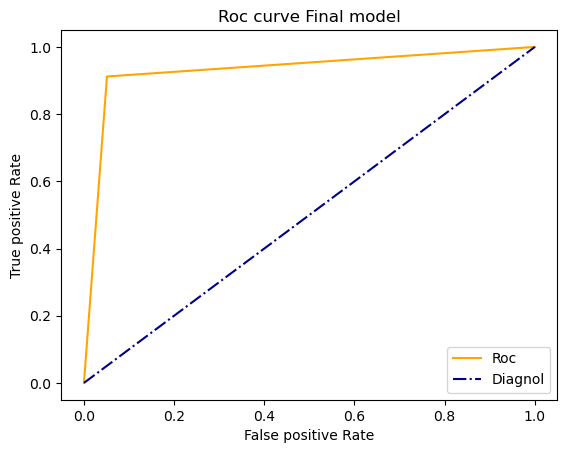

In [66]:
plt.plot(fpr,tpr,color='orange',label = 'Roc') # x axis , y axis ,clr, lable
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve Final model')
plt.legend()
plt.show()

In [67]:
import pickle
with open('final_xgb_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

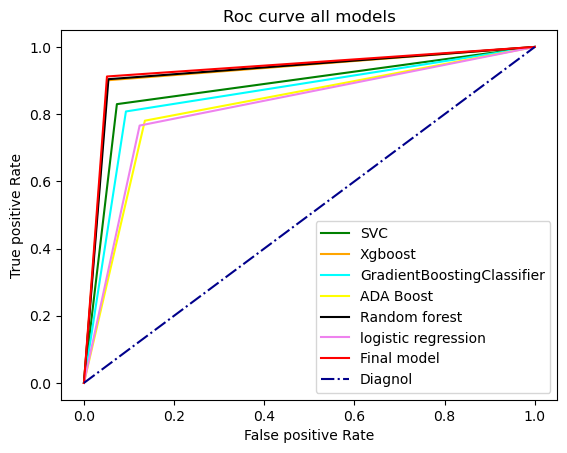

In [68]:
fpr1,tpr1,threshold = roc_curve(y_test,final_model_test_pred)
fpr2,tpr2,threshold = roc_curve(y_test,svc.predict(x_test))
fpr3,tpr3,threshold = roc_curve(y_test,xgb.predict(x_test))
fpr4,tpr4,threshold = roc_curve(y_test,gbc.predict(x_test))
fpr5,tpr5,threshold = roc_curve(y_test,abc.predict(x_test))
fpr6,tpr6,threshold = roc_curve(y_test,rfc.predict(x_test))
fpr7,tpr7,threshold = roc_curve(y_test,lr.predict(x_test))



plt.plot(fpr2,tpr2,color='green',label = 'SVC') # x axis , y axis ,clr, lable
plt.plot(fpr3,tpr3,color='orange',label = 'Xgboost')
plt.plot(fpr4,tpr4,color='cyan',label = 'GradientBoostingClassifier') 
plt.plot(fpr5,tpr5,color='yellow',label = 'ADA Boost') 
plt.plot(fpr6,tpr6,color='black',label = 'Random forest') 
plt.plot(fpr7,tpr7,color='violet',label = 'logistic regression') 
plt.plot(fpr1,tpr1,color='red',label = 'Final model')
plt.plot([0,1],[0,1],color='darkblue',linestyle='-.',label = "Diagnol")
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.title('Roc curve all models')
plt.legend()
plt.show()

### Saving Model

In [69]:
import pickle
with open('final_LR_classifier_model.pkl', 'wb') as file:
    pickle.dump(final_model, file)

### Conclusion

- Our Final Model Predicts Income with Almost 93% Test Accuracy
- From Accuracy Scor and ROC_GRAPH we can say That Our Model Is Best Model

## Target 2: Rainfall (Regression)

### Outliers

In [70]:
df2 = df.copy()
df2

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,0,1,13.4,22.9,0.6,7.4,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,0,0,0,1,7.4,25.1,0.0,7.4,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,0,0,0,1,12.9,25.7,0.0,7.4,13.3,0,0,0,1,1,46.0,0,0,0,0,1,0,0,0,1,0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,0,0,0,1,9.2,28.0,0.0,7.4,13.3,0,0,1,0,0,24.0,0,0,0,1,1,0,0,0,1,1,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,0,0,0,1,17.5,32.3,1.0,7.4,13.3,0,0,0,0,1,41.0,0,0,1,0,0,0,0,1,0,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,1,1,0,0,2.8,23.4,0.0,1.0,0.0,0,1,1,1,1,31.0,0,0,0,1,1,0,1,0,0,0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8421,1,1,0,0,3.6,25.3,0.0,1.0,0.0,0,0,1,0,1,22.0,0,0,0,1,1,0,1,1,0,1,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8422,1,1,0,0,5.4,26.9,0.0,1.0,0.0,0,0,1,1,0,37.0,0,0,0,1,1,0,0,0,0,1,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8423,1,1,0,0,7.8,27.0,0.0,1.0,0.0,0,1,1,0,1,28.0,0,0,1,1,0,0,1,1,0,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


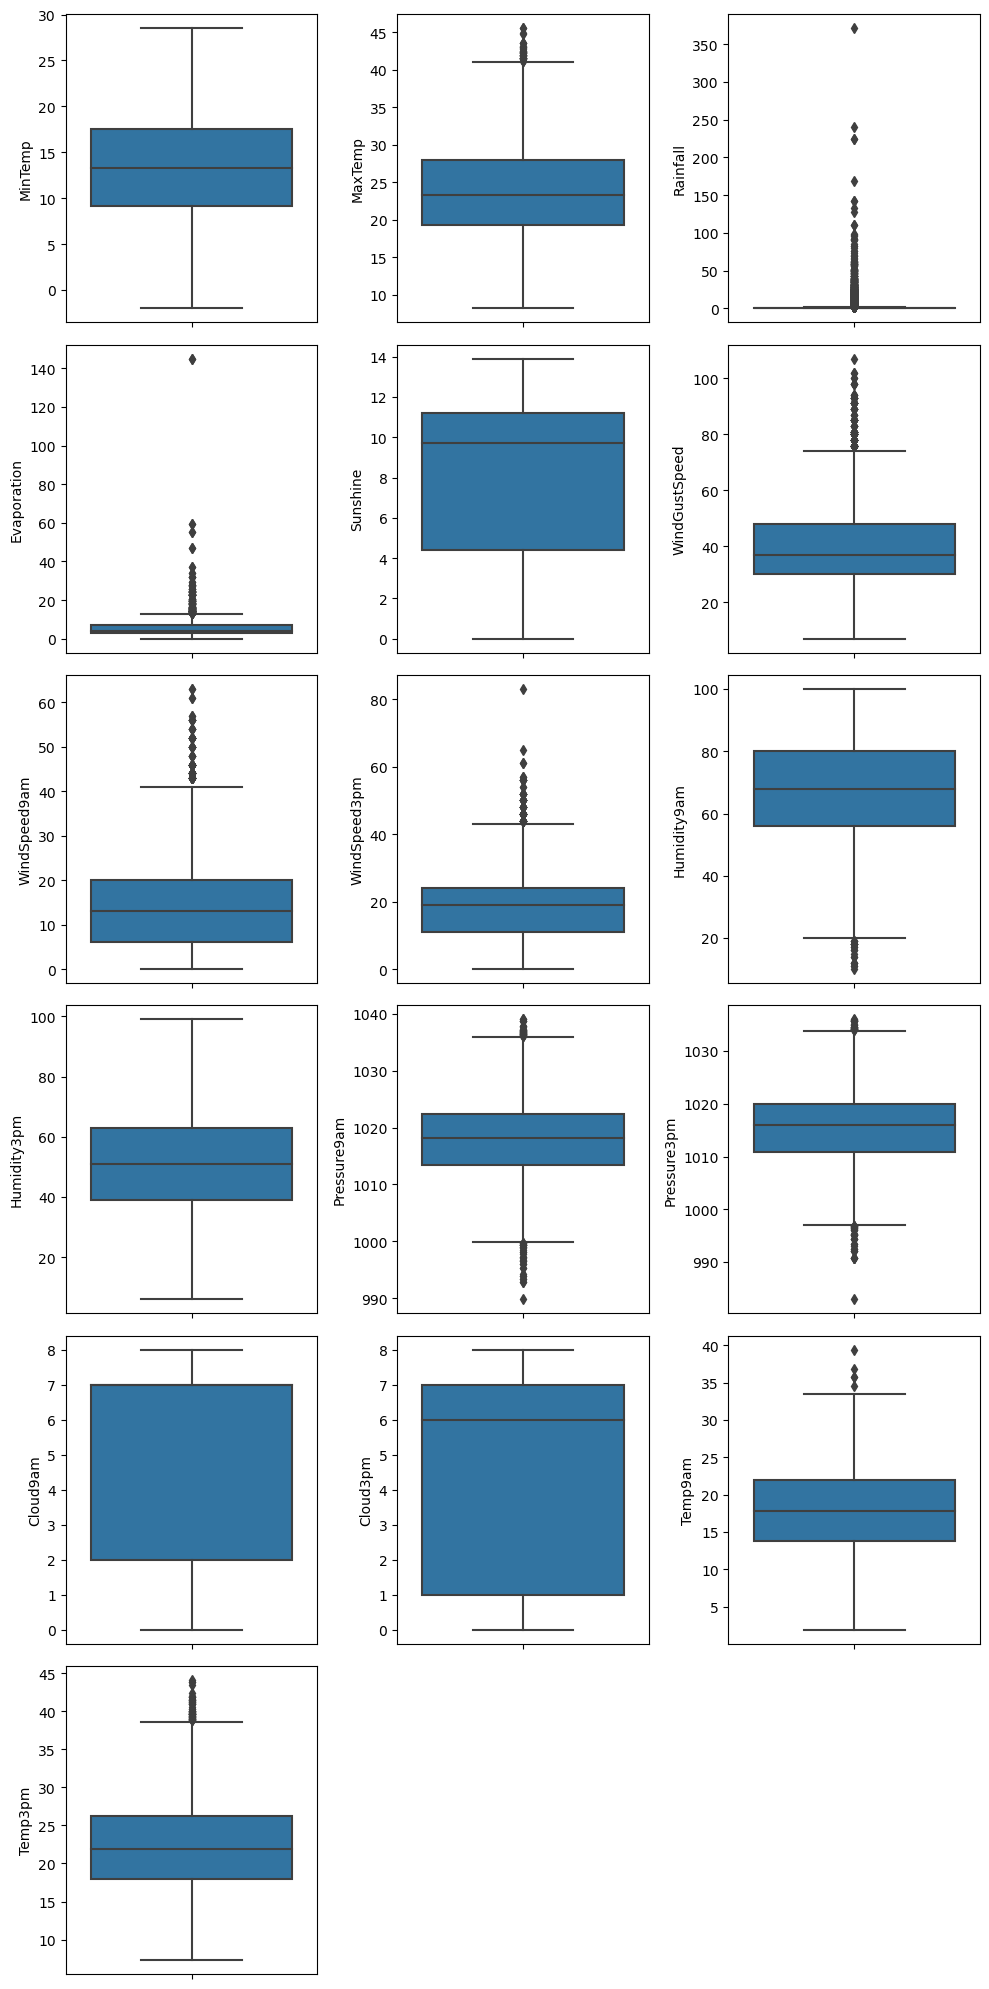

In [71]:
plt.figure(figsize=(10,20))
pn=1
for i in num_col:
    sns.boxplot(data=df2,y=i,ax=plt.subplot(6,3,pn))
    pn+=1
plt.tight_layout()    

- There are Many outliers which are needed to be removed
- we shell use z-score for Removing outliers

In [72]:
prev = df2.shape

In [73]:
# finding outliers using z score
from scipy.stats import zscore
z = np.abs(zscore(df2[num_col]))
z[z>3].count()

MinTemp            0
MaxTemp           17
Rainfall         122
Evaporation       82
Sunshine           0
WindGustSpeed     61
WindSpeed9am      78
WindSpeed3pm      47
Humidity9am       13
Humidity3pm        0
Pressure9am       29
Pressure3pm       28
Cloud9am           0
Cloud3pm           0
Temp9am            4
Temp3pm           21
dtype: int64

<AxesSubplot: >

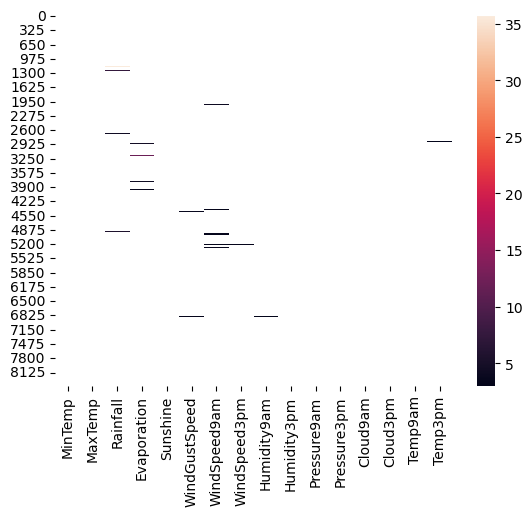

In [74]:
sns.heatmap(z[z>3])

In [75]:
df2[num_col] = df2[num_col][z<3]
df2 = df2.dropna()
df2.reset_index(drop=True,inplace=True)
df2

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,0,0,1,13.4,22.9,0.6,7.4,13.3,0,0,0,0,1,44.0,0,0,0,0,1,0,0,0,0,1,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,7.0,16.9,21.8,0,0
1,0,0,0,1,7.4,25.1,0.0,7.4,13.3,0,0,0,1,0,44.0,0,0,0,1,0,0,0,0,1,0,4.0,22.0,44.0,25.0,1010.6,1007.8,7.0,7.0,17.2,24.3,0,0
2,0,0,0,1,12.9,25.7,0.0,7.4,13.3,0,0,0,1,1,46.0,0,0,0,0,1,0,0,0,1,0,19.0,26.0,38.0,30.0,1007.6,1008.7,7.0,2.0,21.0,23.2,0,0
3,0,0,0,1,9.2,28.0,0.0,7.4,13.3,0,0,1,0,0,24.0,0,0,0,1,1,0,0,0,1,1,11.0,9.0,45.0,16.0,1017.6,1012.8,7.0,7.0,18.1,26.5,0,0
4,0,0,0,1,17.5,32.3,1.0,7.4,13.3,0,0,0,0,1,41.0,0,0,1,0,0,0,0,1,0,0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,1,1,0,0,2.8,23.4,0.0,1.0,0.0,0,1,1,1,1,31.0,0,0,0,1,1,0,1,0,0,0,13.0,11.0,51.0,24.0,1024.6,1020.3,7.0,7.0,10.1,22.4,0,0
8012,1,1,0,0,3.6,25.3,0.0,1.0,0.0,0,0,1,0,1,22.0,0,0,0,1,1,0,1,1,0,1,13.0,9.0,56.0,21.0,1023.5,1019.1,7.0,7.0,10.9,24.5,0,0
8013,1,1,0,0,5.4,26.9,0.0,1.0,0.0,0,0,1,1,0,37.0,0,0,0,1,1,0,0,0,0,1,9.0,9.0,53.0,24.0,1021.0,1016.8,7.0,7.0,12.5,26.1,0,0
8014,1,1,0,0,7.8,27.0,0.0,1.0,0.0,0,1,1,0,1,28.0,0,0,1,1,0,0,1,1,0,1,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,0,0


In [76]:
df2.shape

(8016, 37)

In [77]:
print('Data Loss % = ',np.round((prev[0]-df2.shape[0])*100/prev[0],2),"%")

Data Loss % =  4.85 %


Since our data loss is only 4.85% we can continue

#### Treating Skewness

In [78]:
df2[num_col].skew().abs()

MinTemp          0.083090
MaxTemp          0.319129
Rainfall         3.526536
Evaporation      0.742111
Sunshine         0.734348
WindGustSpeed    0.615089
WindSpeed9am     0.715365
WindSpeed3pm     0.311277
Humidity9am      0.233629
Humidity3pm      0.129106
Pressure9am      0.009446
Pressure3pm      0.057243
Cloud9am         0.615130
Cloud3pm         0.351652
Temp9am          0.041855
Temp3pm          0.341849
dtype: float64

I Feel that there is no need for Skeweness reduction

In [79]:
x = df2.drop(columns='Rainfall')
y=df2['Rainfall']

#### Standerd scaler

In [80]:

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled,columns=x.columns)
x_scaled

,Location_0,Location_1,Location_2,Location_3,MinTemp,MaxTemp,Evaporation,Sunshine,WindGustDir_0,WindGustDir_1,WindGustDir_2,WindGustDir_3,WindGustDir_4,WindGustSpeed,WindDir9am_0,WindDir9am_1,WindDir9am_2,WindDir9am_3,WindDir9am_4,WindDir3pm_0,WindDir3pm_1,WindDir3pm_2,WindDir3pm_3,WindDir3pm_4,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,-0.619081,-0.896764,-1.20941,0.834786,0.057182,-0.143059,0.960920,1.149909,-0.222153,-1.029630,-0.919866,-1.115965,0.969768,0.418384,-0.231876,-1.118787,-0.918250,-0.927054,0.828561,-0.266618,-0.989822,-1.119636,-0.999751,1.153357,0.717831,0.643111,0.180422,-1.621161,-1.636696,-1.385384,1.092876,0.861308,-0.135771,-0.089790,-0.541591,-0.543132
1,-0.619081,-0.896764,-1.20941,0.834786,-1.052004,0.222357,0.960920,1.149909,-0.222153,-1.029630,-0.919866,0.896085,-1.031174,0.418384,-0.231876,-1.118787,-0.918250,1.078686,-1.206911,-0.266618,-0.989822,-1.119636,1.000250,-0.867034,-0.977397,0.427350,-1.456921,-1.454862,-1.178135,-1.274724,0.734471,0.861308,-0.082187,0.335949,-0.541591,-0.543132
2,-0.619081,-0.896764,-1.20941,0.834786,-0.035250,0.322016,0.960920,1.149909,-0.222153,-1.029630,-0.919866,0.896085,0.969768,0.571541,-0.231876,-1.118787,-0.918250,-0.927054,0.828561,-0.266618,-0.989822,-1.119636,1.000250,-0.867034,0.611879,0.858872,-1.820775,-1.177697,-1.652508,-1.132447,0.734471,-0.944667,0.596539,0.148624,-0.541591,-0.543132
3,-0.619081,-0.896764,-1.20941,0.834786,-0.719248,0.704042,0.960920,1.149909,-0.222153,-1.029630,1.087115,-1.115965,-1.031174,-1.113190,-0.231876,-1.118787,-0.918250,1.078686,0.828561,-0.266618,-0.989822,-1.119636,1.000250,1.153357,-0.235735,-0.975097,-1.396279,-1.953760,-0.071264,-0.484297,0.734471,0.861308,0.078564,0.710599,-0.541591,-0.543132
4,-0.619081,-0.896764,-1.20941,0.834786,0.815126,1.418264,0.960920,1.149909,-0.222153,-1.029630,-0.919866,-1.115965,0.969768,0.188648,-0.231876,-1.118787,1.089029,-0.927054,-1.206911,-0.266618,-0.989822,0.893148,-0.999751,-0.867034,-0.659542,0.211589,0.847487,-1.011398,-1.146510,-1.559278,0.734471,1.222503,0.024980,1.255545,-0.541591,-0.543132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8011,1.615297,1.115120,-1.20941,-1.197912,-1.902380,-0.060010,-1.329291,-1.762577,-0.222153,0.971222,1.087115,0.896085,0.969768,-0.577139,-0.231876,-1.118787,-0.918250,1.078686,0.828561,-0.266618,1.010282,-1.119636,-0.999751,-0.867034,-0.023831,-0.759336,-1.032425,-1.510295,1.035606,0.701345,0.734471,0.861308,-1.350333,0.012388,-0.541591,-0.543132
8012,1.615297,1.115120,-1.20941,-1.197912,-1.754488,0.255577,-1.329291,-1.762577,-0.222153,-1.029630,1.087115,-1.115965,0.969768,-1.266348,-0.231876,-1.118787,-0.918250,1.078686,0.828561,-0.266618,1.010282,0.893148,-0.999751,1.153357,-0.023831,-0.975097,-0.729213,-1.676594,0.861669,0.511642,0.734471,0.861308,-1.207443,0.370008,-0.541591,-0.543132
8013,1.615297,1.115120,-1.20941,-1.197912,-1.421732,0.521334,-1.329291,-1.762577,-0.222153,-1.029630,1.087115,0.896085,-1.031174,-0.117667,-0.231876,-1.118787,-0.918250,1.078686,0.828561,-0.266618,-0.989822,-1.119636,-0.999751,1.153357,-0.447638,-0.975097,-0.911140,-1.510295,0.466358,0.148045,0.734471,0.861308,-0.921664,0.642481,-0.541591,-0.543132
8014,1.615297,1.115120,-1.20941,-1.197912,-0.978058,0.537944,-1.329291,-1.762577,-0.222153,0.971222,1.087115,-1.115965,0.969768,-0.806876,-0.231876,-1.118787,1.089029,1.078686,-1.206911,-0.266618,1.010282,0.893148,-0.999751,1.153357,-0.023831,-1.190858,-1.032425,-1.510295,0.213359,0.100620,-0.699149,-0.944667,-0.457272,0.625452,-0.541591,-0.543132


### Train test Split

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
lr = LinearRegression()

In [82]:
# finding best random state
tts_df = pd.DataFrame(data=None,columns=['Random state','Train accuracy','Test accuracy'])
for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
    train_score = r2_score(y_train,pred_train)
    test_score = r2_score(y_test,pred_test)
    if round(train_score*100,0) == round(test_score*100,0):
        tts_df =tts_df.append({'Random state':i,'Train accuracy':train_score*100,'Test accuracy':test_score*100},ignore_index=True)

    
tts_df.sort_values('Test accuracy',ascending=False)  


,Random state,Train accuracy,Test accuracy
14,52.0,49.878615,50.499020
8,34.0,49.875395,50.498707
118,532.0,49.927692,50.495603
226,889.0,49.900910,50.492142
230,899.0,49.909434,50.483370
...,...,...,...
248,975.0,50.161382,49.514345
193,759.0,50.102693,49.508411
48,226.0,50.135325,49.506594
66,311.0,50.188261,49.506546


- Therefore best random state is 52

In [83]:
# Training model at best Random state
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.20,random_state=52)

## Training models

In [84]:
# Defining training model
def mod_train (model,x_tr,x_te,y_tr,y_te):
    model.fit(x_tr,y_tr)
    return r2_score(y_te,model.predict(x_te))


In [85]:
# Defining cv model using k fold
def cv_mod (model,x_scaled,y,cv):
    # Set the number of folds for cross-validation
    num_folds = cv

    # Create a KFold object
    kf = KFold(n_splits=num_folds, shuffle=True,random_state=150)

    # Initialize an empty list to store the MSE scores
    r2_scores = []

    # Perform K-fold cross-validation
    for train_index, test_index in kf.split(x_scaled):
        # Get the training and test sets for this fold
        X_train_1, X_test_1 = x_scaled.iloc[train_index], x_scaled.iloc[test_index]
        y_train_1, y_test_1 = y.iloc[train_index], y.iloc[test_index]

        # Fit the model on the training data
        model.fit(X_train_1, y_train_1)

        # Make predictions on the test data
        y_pred = model.predict(X_test_1)

        # Calculate the MSE for this fold and append to the list
        r2_scores.append(r2_score(y_test_1, y_pred))

    # Return Calculated average MSE score
    return np.mean(r2_scores)

#### Linear Regression

In [86]:
lr = LinearRegression()


lr_r2_test_score = mod_train (lr,x_train,x_test,y_train,y_test)
print(lr_r2_test_score*100,"%")

50.49901990479546 %


In [87]:
# Find best cv using k-fold
from sklearn.model_selection import KFold
for i in range(2,10):
    avg_mse_score = cv_mod (LinearRegression(),x_scaled,y,i)

    # Print the average MSE score
    print('CV = ',i,"Average r2 score:", round(avg_mse_score*100,5),'Difference = ',round(np.abs(avg_mse_score-lr_r2_test_score)*100,4))

CV =  2 Average r2 score: 49.08865 Difference =  1.4104
CV =  3 Average r2 score: 49.26475 Difference =  1.2343
CV =  4 Average r2 score: 49.32869 Difference =  1.1703


CV =  5 Average r2 score: 49.37601 Difference =  1.123
CV =  6 Average r2 score: 49.48135 Difference =  1.0177
CV =  7 Average r2 score: 49.50008 Difference =  0.9989
CV =  8 Average r2 score: 49.61122 Difference =  0.8878
CV =  9 Average r2 score: 49.53614 Difference =  0.9629


- cv = 8 is giving comparitively better result

In [88]:
# creating df for storing cv score and acc score
ms_df = pd.DataFrame(data=None,columns=['Model','CV score','Test accuracy','Difference'])

In [89]:
#best cv score at cv = 8
cv = 8
avg_r2_score = cv_mod (LinearRegression(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(lr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Linear regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(lr_r2_test_score*100,4),'Difference':round(np.abs(lr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  49.61122 % 
r2 score =  50.499 % 
Difference =  0.8878 %



##### DecisionTreeRegressor

In [90]:
from sklearn.tree import DecisionTreeRegressor

dtr_r2_test_score = mod_train (DecisionTreeRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (DecisionTreeRegressor(),x_scaled,y,6)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(dtr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Decision Tree regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(dtr_r2_test_score*100,4),'Difference':round(np.abs(dtr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  36.623222 % 
r2 score =  38.1261 % 
Difference =  1.5029 %



##### RandomForestRegressor

In [91]:
from sklearn.ensemble import RandomForestRegressor
rfr_r2_test_score = mod_train (RandomForestRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (RandomForestRegressor(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(rfr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Random forest regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(rfr_r2_test_score*100,4),'Difference':round(np.abs(rfr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  66.658642 % 
r2 score =  67.1791 % 
Difference =  0.5205 %



#### AdaBoostRegressor

In [92]:
from sklearn.ensemble import AdaBoostRegressor
abr_r2_test_score  = mod_train (AdaBoostRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (AdaBoostRegressor(),x_scaled,y,cv)

# Print the average MSE score
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(abr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Ada Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(abr_r2_test_score*100,4),'Difference':round(np.abs(abr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  66.567752 % 
r2 score =  67.8472 % 
Difference =  1.2794 %



#### GradientBoostingRegressor

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_r2_test_score  = mod_train (GradientBoostingRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (GradientBoostingRegressor(),x_scaled,y,cv)
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(gbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':'Gradient Boost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(gbr_r2_test_score*100,4),'Difference':round(np.abs(gbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)


Cross Validation score =  55.285223 % 
r2 score =  56.4324 % 
Difference =  1.1472 %



#### XGBRegressor

In [94]:
from xgboost import XGBRegressor
xgbr_r2_test_score = mod_train (XGBRegressor(),x_train,x_test,y_train,y_test)

avg_r2_score = cv_mod (XGBRegressor(),x_scaled,y,cv)
print('\nCross Validation score = ',round(avg_r2_score*100,6),'%','\nr2 score = ',round(xgbr_r2_test_score*100,4),'%','\nDifference = ',round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4),'%',end = '\n\n')
ms_df = ms_df.append({'Model':' XGBoost regression','CV score':round(avg_r2_score*100,4),'Test accuracy':round(xgbr_r2_test_score*100,4),'Difference':round(np.abs(xgbr_r2_test_score*100 - avg_r2_score*100),4)},ignore_index=True)



Cross Validation score =  65.300329 % 
r2 score =  66.7722 % 
Difference =  1.4719 %



In [95]:
ms_df.sort_values(by='Test accuracy',ascending=False,ignore_index=True)

,Model,CV score,Test accuracy,Difference
0,Ada Boost regression,66.5678,67.8472,1.2794
1,Random forest regression,66.6586,67.1791,0.5205
2,XGBoost regression,65.3003,66.7722,1.4719
3,Gradient Boost regression,55.2852,56.4324,1.1472
4,Linear regression,49.6112,50.4990,0.8878
5,Decision Tree regression,36.6232,38.1261,1.5029


- Random Forest Regression is giving best test accuracy and cv scores therefore we can use Random Forest Regression for our problem 


### Hyperparameter Tuning

In [97]:
from sklearn.model_selection import GridSearchCV
grid_parm = {
    'max_depth': [None, 10],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

In [98]:
gcv = GridSearchCV(estimator=RandomForestRegressor(),param_grid=grid_parm,cv=5,scoring = 'r2')
gcv.fit(x_train,y_train)
gcv.best_params_

{'bootstrap': False, 'max_depth': None, 'max_features': 'sqrt'}

In [99]:
final_model = RandomForestRegressor(bootstrap= False, max_depth= None, max_features= 'sqrt')
final_model.fit(x_train,y_train)
final_model_test_pred=final_model.predict(x_test)

In [100]:
r2 = r2_score(y_test, final_model_test_pred)
mse_score = mean_absolute_error(y_test, final_model_test_pred)
mae_score = mean_squared_error(y_test, final_model_test_pred)
print('\nR2 Score = ',r2,'\nMean Squared error = ',mse_score,'\nMean absolute error = ',mae_score)


R2 Score =  0.7071027856160899 
Mean Squared error =  0.8149619700748135 
Mean absolute error =  6.3466076415211985


Text(0.5, 1.0, 'Actual vs Predicted Test')

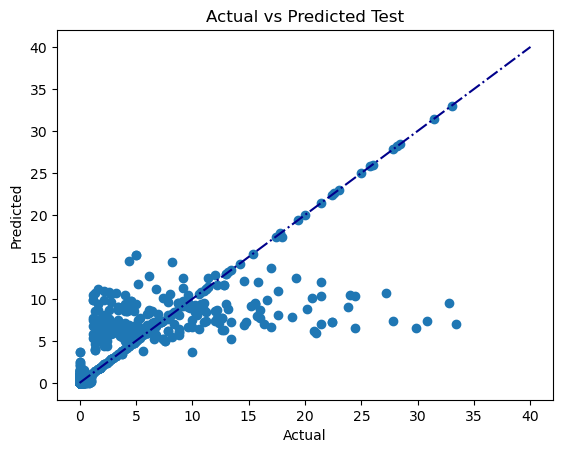

In [103]:
plt.scatter(y_test, final_model_test_pred)

plt.plot([0,40],[0,40],color='darkblue',linestyle='-.',label = "Diagnol")
plt.ylabel("Predicted")
plt.xlabel('Actual')
plt.title('Actual vs Predicted Test')

### Saving Model

In [104]:
import pickle
with open('final_gb_classifier_model.pkl', 'wb') as file:

    pickle.dump(final_model, file)

##### from graph and r2 score we can confidently say that our model predicted 70.71% of data accurately